In [2]:
import pandas as pd
import openpyxl
import os

# Exploration Data Analytics (EDA) for US Immigrants PERM Application on Quarter 4, 2022

## I. Read the dataset from CSV file

In [3]:
data_folder = os.getcwd().replace("notebook","data")

In [4]:
data_path = os.path.join(data_folder,"PERM_Data_FY2022_Q4.csv")

In [5]:
df1 = pd.read_csv(data_path)

c:\Users\cindydao\OneDrive - UNT System\Study\Fall 2022\DSCI 4700\Coding\venv1\lib\site-packages\IPython\core\interactiveshell.py:3258: DtypeWarning: Columns (6,7,17,20,86,123) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
df1.head()

,Unnamed: 0,CASE_NUMBER,CASE_STATUS,RECEIVED_DATE,DECISION_DATE,REFILE,ORIG_FILE_DATE,PREVIOUS_SWA_CASE_NUMBER_STATE,SCHD_A_SHEEPHERDER,EMPLOYER_NAME,...,FOREIGN_WORKER_ALT_OCC_EXP,FOREIGN_WORKER_EXP_WITH_EMPL,FOREIGN_WORKER_EMPL_PAY_FOR_ED,FOREIGN_WORKER_CURR_EMPLOYED,EMPLOYER_COMPLETED_APPLICATION,PREPARER_NAME,PREPARER_TITLE,PREPARER_EMAIL,EMP_INFO_DECL_NAME,EMP_DECL_TITLE
0,0,A-20345-31895,Certified-Expired,2021-04-22,2021-10-01,N,NaN,NaN,N,VIGO INDUSTRIES,...,Y,N,N,Y,N,Hui Zeng,Attorney,hui@zenglawgroup.com,Spresime Bekteshi,HR Manager
1,1,A-21068-59828,Certified-Expired,2021-04-20,2021-10-01,N,NaN,NaN,N,VESUVIUS USA CORPORATION,...,Y,N,N,Y,N,Frances P Rayer,Member,frayer@cozen.com,Tricia Rosenberger,Sr. Regional HR Manager NAFTA
2,2,A-20318-20833,Certified-Expired,2020-11-16,2021-10-01,N,NaN,NaN,N,Kikkerland Design Inc,...,NaN,NaN,N,Y,N,PETER T JENSEN,ATTORNEY,PTJENSEN@JENSENLAW.COM,LOREN S ROWER,CFO
3,3,A-21083-65884,Certified-Expired,2021-04-16,2021-10-01,N,NaN,NaN,N,yalai inc,...,NaN,N,N,Y,N,Ge Lei,Attorney,linda.lei@getechlaw.com,Huiqing Chen,President
4,4,A-21098-71922,Certified-Expired,2021-04-13,2021-10-01,N,NaN,NaN,N,VIACOMCBS INC.,...,Y,N,N,N,N,Laura F Reiff,Attorney,ReiffL@gtlaw.com,Kimberly Wong,Senior Human Resources Specialist


In [7]:
df1.PW_SOC_TITLE.value_counts()[:20]

Software Developers, Applications                   23292
Software Developers, Systems Software               11292
Computer Systems Analysts                            5715
Statisticians                                        2761
Information Technology Project Managers              2689
Electronics Engineers, Except Computer               1977
Software Quality Assurance Engineers and Testers     1628
Computer and Information Systems Managers            1525
Mechanical Engineers                                 1058
Network and Computer Systems Administrators           887
Computer Systems EngineersArchitects                  874
Management Analysts                                   841
Electrical Engineers                                  780
Financial Analysts                                    776
Marketing Managers                                    753
Nursing Aide                                          726
Accountants                                           696
Landscaping an

In [8]:
df1.columns

Index(['Unnamed: 0', 'CASE_NUMBER', 'CASE_STATUS', 'RECEIVED_DATE',
       'DECISION_DATE', 'REFILE', 'ORIG_FILE_DATE',
       'PREVIOUS_SWA_CASE_NUMBER_STATE', 'SCHD_A_SHEEPHERDER', 'EMPLOYER_NAME',
       ...
       'FOREIGN_WORKER_ALT_OCC_EXP', 'FOREIGN_WORKER_EXP_WITH_EMPL',
       'FOREIGN_WORKER_EMPL_PAY_FOR_ED', 'FOREIGN_WORKER_CURR_EMPLOYED',
       'EMPLOYER_COMPLETED_APPLICATION', 'PREPARER_NAME', 'PREPARER_TITLE',
       'PREPARER_EMAIL', 'EMP_INFO_DECL_NAME', 'EMP_DECL_TITLE'],
      dtype='object', length=155)

In [9]:
#Select only the columns needed for Data Analytics
df2 = df1[['CASE_NUMBER','CASE_STATUS','WORKSITE_CITY','WORKSITE_STATE','EMPLOYER_NAME','EMPLOYER_STATE_PROVINCE','MAJOR_FIELD_OF_STUDY','JOB_TITLE','RECEIVED_DATE','DECISION_DATE','JOB_TITLE','MINIMUM_EDUCATION']]

In [10]:
#drop any duplicated columns
df2 = df2.loc[:,~df2.columns.duplicated()]

In [11]:
#save the new data into data folder
data_path2 = os.path.join(data_folder,"PERM_data_analytic_2022_Q4.csv")
if not os.path.exists(data_path2):
    df2.to_csv(data_path2)

In [12]:
#show the first 5 rows of the dataframe
df2.head()

,CASE_NUMBER,CASE_STATUS,WORKSITE_CITY,WORKSITE_STATE,EMPLOYER_NAME,EMPLOYER_STATE_PROVINCE,MAJOR_FIELD_OF_STUDY,JOB_TITLE,RECEIVED_DATE,DECISION_DATE,MINIMUM_EDUCATION
0,A-20345-31895,Certified-Expired,New York,NEW YORK,VIGO INDUSTRIES,NEW YORK,marketing intelligence or a closely related field,Marketing Manager,2021-04-22,2021-10-01,Master's
1,A-21068-59828,Certified-Expired,Pittsburgh,PENNSYLVANIA,VESUVIUS USA CORPORATION,ILLINOIS,Metallurgical Engineering,Strategic Marketing Manager,2021-04-20,2021-10-01,Bachelor's
2,A-20318-20833,Certified-Expired,New York,NEW YORK,Kikkerland Design Inc,NEW YORK,"Business, Management or related",Director of Sales,2020-11-16,2021-10-01,Master's
3,A-21083-65884,Certified-Expired,Burlington,MASSACHUSETTS,yalai inc,MASSACHUSETTS,"BUSINESS, PROJECT MANAGEMENT OR RELATED",Business Manager,2021-04-16,2021-10-01,Master's
4,A-21098-71922,Certified-Expired,New York,NEW YORK,VIACOMCBS INC.,CALIFORNIA,Computer Science or Computer Engineering,VP Enterprise Solution Delivery,2021-04-13,2021-10-01,Bachelor's


## II. Exploration Data Analytics

### Data Analysis Questions


1. What states has the most sponsorship jobs offer?
2. what is minimum requirement degree for each kind of job, considered only 15 popular jobs?
3. Investigate the Data-related field, show the popularity of each specific Data job.
4. What companies offer Data Jobs?
5. Where (at what State) is the Data Jobs being offered?


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 1. What states has the most sponshorship jobs being offered?

Text(0.5, 1.0, 'Number of Employment Sponsorship Applications among States in 2022 Quarter 4')

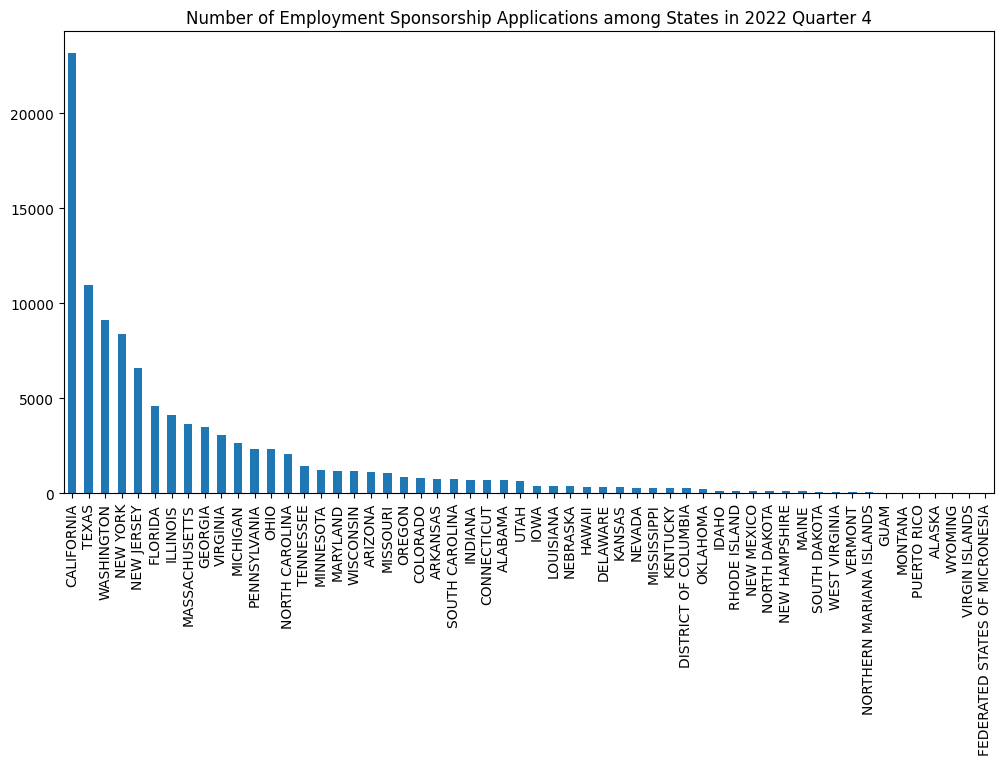

In [14]:
#Check the number of employment-sponsorship applications among states
plt.figure(figsize=(12,6))
df2['WORKSITE_STATE'].value_counts().plot.bar()
plt.title("Number of Employment Sponsorship Applications among States in 2022 Quarter 4")

Figure 1 shows CALIFORNIA has the most applications for sponsor-employment visas, followed by TEXAS, WASHINGTON, NEW YORK and NEW JERSEY.

In [15]:
# group the top 5 states in a list for further investigation
top_state = ['CALIFORNIA','TEXAS','WASHINGTON','NEW YORK','NEW JERSEY']

In [16]:
top_state_df = df2.loc[df2['WORKSITE_STATE'].isin(top_state),:]

### 2. what is minimum requirement degree for each kind of job, considered only 15 popular jobs?

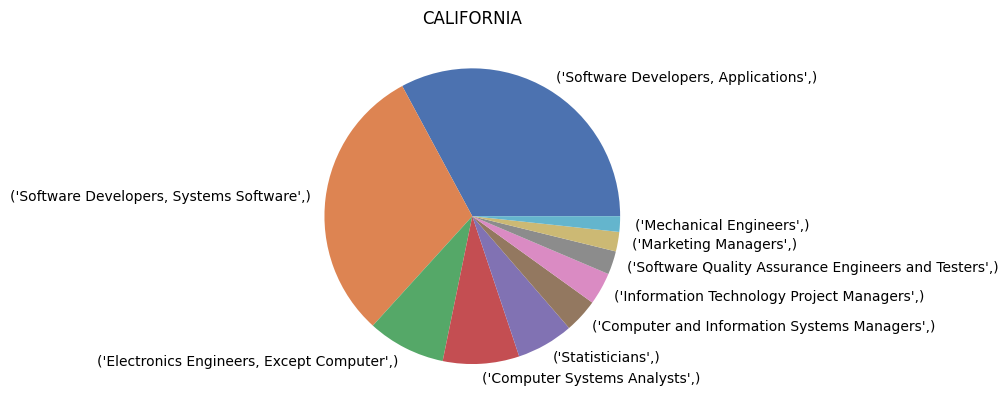

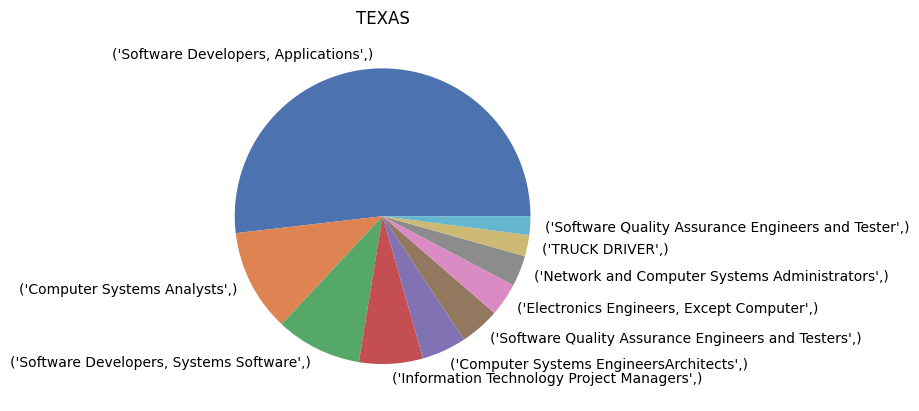

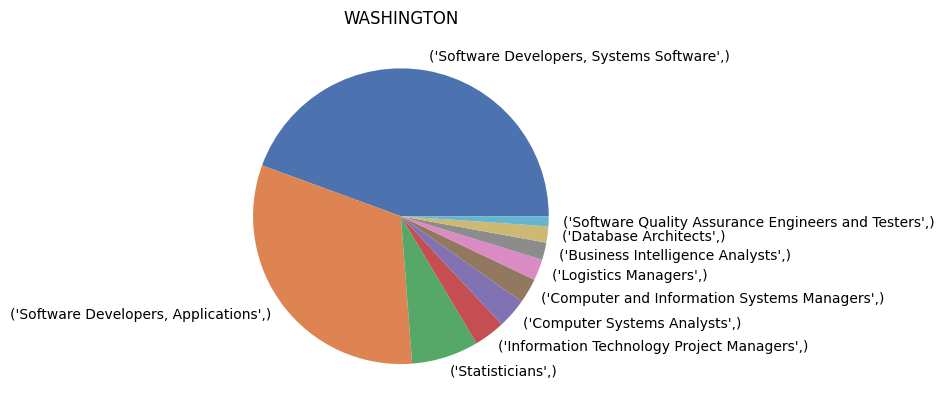

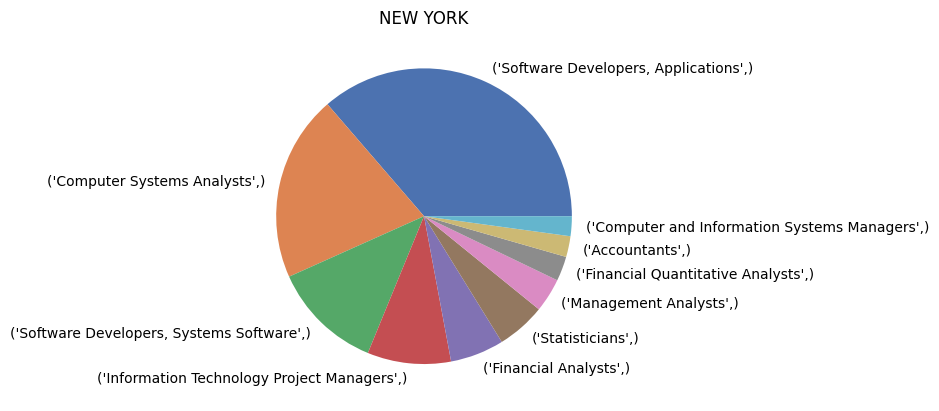

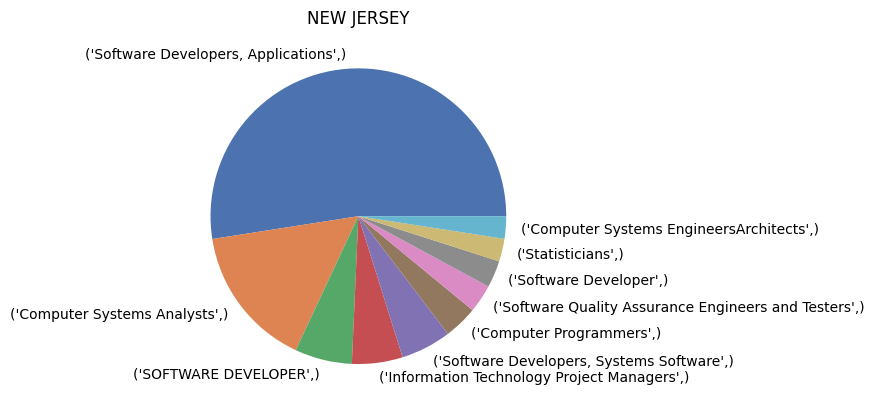

In [17]:
palette_color = sns.color_palette('deep')
for state in top_state:
    x = df1.loc[df1['WORKSITE_STATE']==state, ['PW_SOC_TITLE']].value_counts()[:10].values
    labels =  df1.loc[df1['WORKSITE_STATE']==state, ['PW_SOC_TITLE']].value_counts()[:10].index
    plt.title(state)
    plt.pie(x = x, labels = labels, colors = palette_color)
    plt.show()

### 3. Investigate the Data-related field, show the popularity of each specific Data job.


In [18]:
top_job_titles = df1.PW_SOC_TITLE.value_counts()[:20].index

In [ ]:
df1.loc[df1.]

In [19]:
top_job_titles

Index(['Software Developers, Applications',
       'Software Developers, Systems Software', 'Computer Systems Analysts',
       'Statisticians', 'Information Technology Project Managers',
       'Electronics Engineers, Except Computer',
       'Software Quality Assurance Engineers and Testers',
       'Computer and Information Systems Managers', 'Mechanical Engineers',
       'Network and Computer Systems Administrators',
       'Computer Systems EngineersArchitects', 'Management Analysts',
       'Electrical Engineers', 'Financial Analysts', 'Marketing Managers',
       'Nursing Aide', 'Accountants', 'Landscaping and Groundskeeping Workers',
       'Medical and Clinical Laboratory Technologists',
       'Industrial Engineers'],
      dtype='object')

In [66]:
len(top_job_titles)

20

In [110]:
df1.loc[df1.PW_SOC_TITLE.isin(top_job_titles),['MINIMUM_EDUCATION']]

,MINIMUM_EDUCATION
0,Master's
1,Bachelor's
4,Bachelor's
5,Bachelor's
12,Master's
...,...
104539,High School
104540,High School
104541,High School
104542,High School


In [113]:
sub = df1.loc[df1.PW_SOC_TITLE.isin(top_job_titles),:]

<AxesSubplot:xlabel='count', ylabel='PW_SOC_TITLE'>

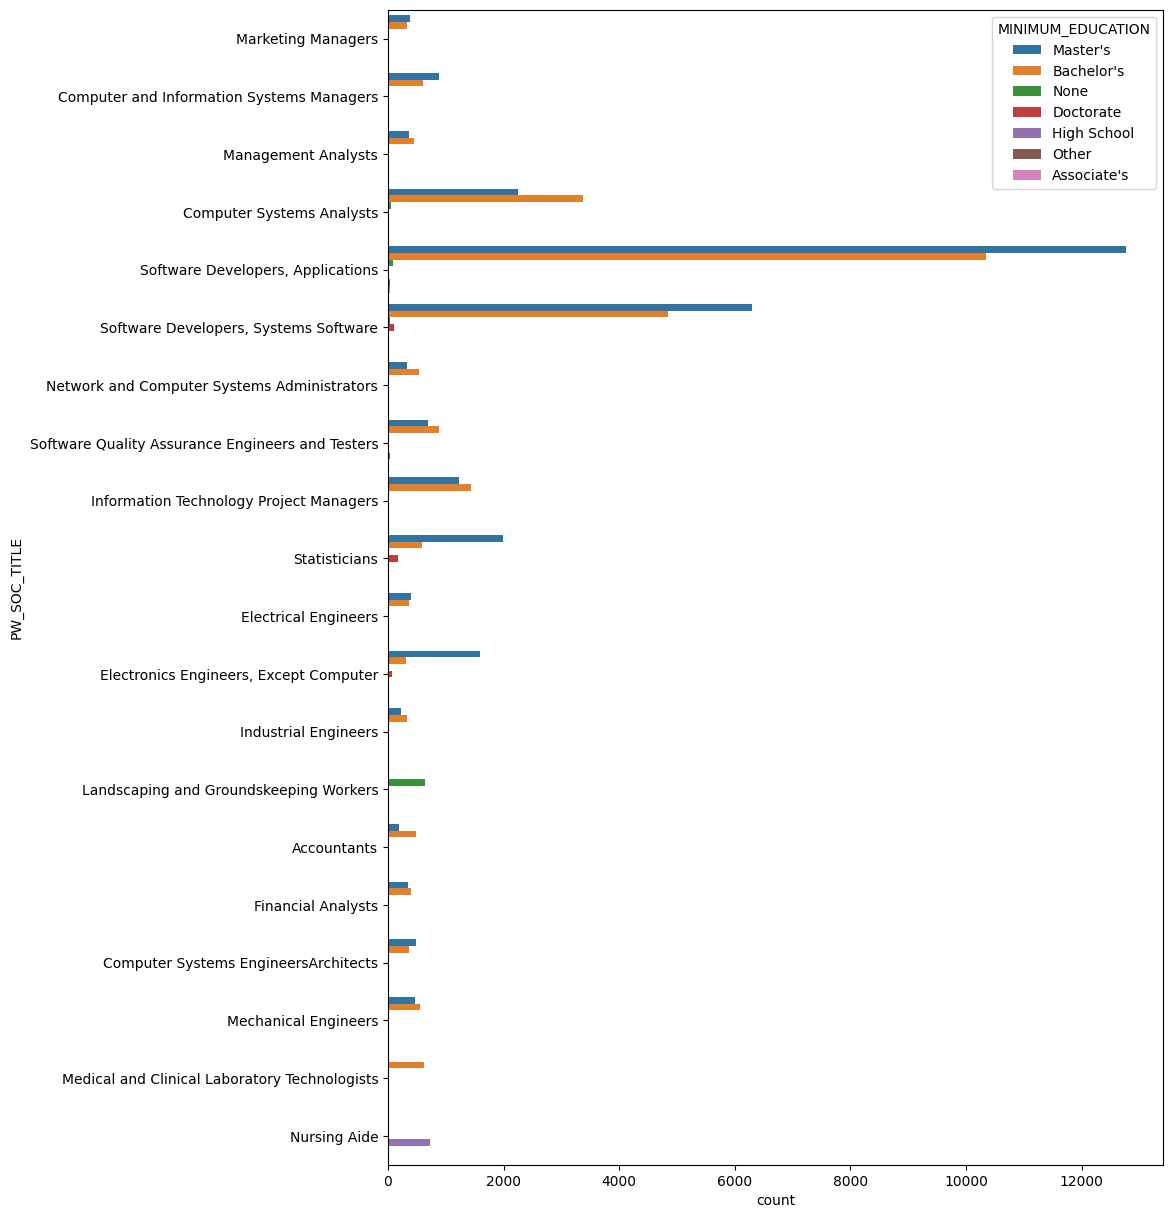

In [120]:
plt.figure(figsize=(10,15))
sns.countplot(data =sub,y="PW_SOC_TITLE",hue='MINIMUM_EDUCATION')


### 4. What companies offer Data Jobs?


In [21]:
#Data Engineering.
#Define the functions to classify non-data related fields on one group, 
#and return the data jobs as its name
def group_data_related_job(row):

    value = str(row["PW_SOC_TITLE"]).lower()
    if "data" in value:
        return value
    else:
        not_data_job = "Non-related Data Field"
        return not_data_job
    
    

In [22]:
#use apply method on DataFrame to return a desired value to a new column named Data_related_Field
df1["Data_related_Field"] = df1.apply(lambda row: group_data_related_job(row),axis =1)

In [23]:
#Subset observations related to only Data-related jobs
data_job_df = df1.loc[~df1["Data_related_Field"].str.contains("Non-related Data Field"),:]

In [24]:
#Drop the unwanted column
data_job_df.drop("Unnamed: 0",axis=1,inplace=True)

c:\Users\cindydao\OneDrive - UNT System\Study\Fall 2022\DSCI 4700\Coding\venv1\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [25]:
data_job_df.Data_related_Field.value_counts()[:10]

database administrators         497
data warehousing specialists    492
database architects             373
database administrator           80
clinical data managers           57
database architect               43
data warehousing specialist      18
data analyst                     13
database developer               11
data engineer                     7
Name: Data_related_Field, dtype: int64

In [26]:
data_jobs = data_job_df.Data_related_Field.value_counts()[:10].index

In [27]:
df1.Data_related_Field.isin(data_jobs)

0         False
1         False
2         False
3         False
4         False
          ...  
104595    False
104596    False
104597    False
104598    False
104599    False
Name: Data_related_Field, Length: 104600, dtype: bool

In [28]:
subset = df1.loc[df1.Data_related_Field.isin(data_jobs),["EMPLOYER_NAME","Data_related_Field"]]

In [29]:
#Show the first 5 rows
subset.head()

,EMPLOYER_NAME,Data_related_Field
132,ELLUCIAN COMPANY LP,database administrators
133,"YANKA INDUSTRIES, INC.",database administrators
134,THE OHIO UNIVERSITY,database administrators
135,"EAB GLOBAL, INC",database administrators
143,"VIRGIN PULSE, INC.",data warehousing specialists


In [30]:
cross_df = pd.crosstab(index = subset["EMPLOYER_NAME"],columns=subset["Data_related_Field"])

In [31]:
cross_df.head()

Data_related_Field,clinical data managers,data analyst,data engineer,data warehousing specialist,data warehousing specialists,database administrator,database administrators,database architect,database architects,database developer
EMPLOYER_NAME,,,,,,,,,,
"23ANDME, INC",0,0,0,0,1,0,0,0,0,0
3CORE SYSTEMS INC,0,0,0,0,0,2,0,0,0,0
4 CONSULTING INC.,0,0,0,0,1,0,0,0,0,0
"8X8, INC.",0,0,0,1,0,0,0,0,0,0
9LOGIC TECHNOLOGIES INC,0,0,0,0,0,0,1,0,0,0


In [32]:
cross_df.describe()

Data_related_Field,clinical data managers,data analyst,data engineer,data warehousing specialist,data warehousing specialists,database administrator,database administrators,database architect,database architects,database developer
count,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000
mean,0.069512,0.015854,0.008537,0.021951,0.600000,0.097561,0.606098,0.052439,0.454878,0.013415
std,0.310653,0.228586,0.104480,0.169769,1.709272,0.684911,0.956802,1.363552,4.735666,0.167041
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,3.000000,6.000000,2.000000,2.000000,28.000000,13.000000,9.000000,39.000000,134.000000,4.000000


<AxesSubplot:>

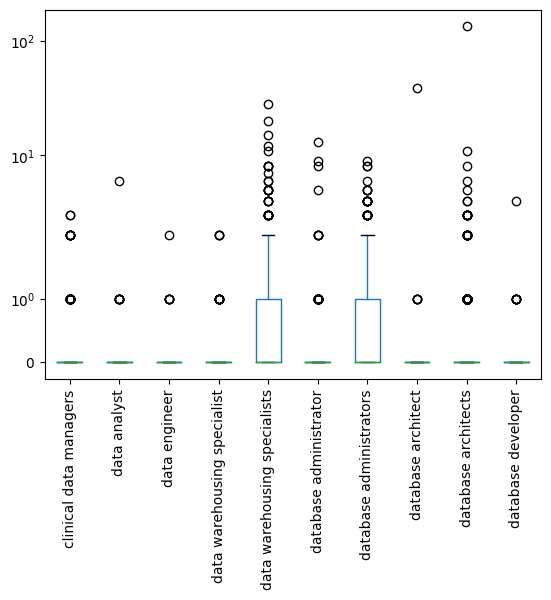

In [33]:
cross_df.plot(kind="box",rot="vertical",logy='sym')

In [34]:
cross_df.loc[cross_df.sum(axis=1) >5,:]

Data_related_Field,clinical data managers,data analyst,data engineer,data warehousing specialist,data warehousing specialists,database administrator,database administrators,database architect,database architects,database developer
EMPLOYER_NAME,,,,,,,,,,
"AMAZON WEB SERVICES, INC.",0,0,0,0,8,0,2,0,3,0
AMAZON.COM SERVICES LLC,0,0,0,0,28,0,2,1,134,0
AMGEN INC.,1,0,0,0,4,0,0,0,1,0
"ANTHEM, INC.",1,0,0,0,3,0,1,0,1,0
APPTAD INC,0,0,0,0,5,0,1,0,0,0
CITIUSTECH INC,0,0,0,0,11,0,0,0,0,0
"COMPUNNEL SOFTWARE GROUP, INC.",0,0,0,0,0,13,2,39,11,4
DELOITTE CONSULTING LLP,0,0,0,2,0,0,9,0,0,0
ERNST YOUNG U.S. LLP,0,0,0,0,6,0,0,0,0,0


In [57]:
df1_copy = df1.copy()

In [ ]:
df1_copy.WORKSITE_STATE =="TEXAS"

In [76]:
df1_copy.loc[(df1_copy.CASE_STATUS == "Denied") & (df1_copy.WORKSITE_STATE =="TEXAS"),["AGENT_ATTORNEY_EMAIL"]].value_counts()[5:20]

AGENT_ATTORNEY_EMAIL               
usa-workforce-solutions@outlook.com    10
salman@drj.legal                        9
perm@immlaws.com                        9
shannon@shannonesq.com                  7
lawoffices@misbahchaudhry.com           7
laborcert@yahoo.com                     7
hong@cbilawyers.com                     7
nbahnan@fragomen.com                    5
ELIZABETH@EREEDLAWFIRM.COM              4
jjb@boudia.com                          4
greenvisalaw@gmail.com                  4
legal@anilalilaw.com                    3
david.serwer@bakermckenzie.com          3
BILAL@BOLDLEGAL.COM                     3
amdperm@ogletree.com                    3
dtype: int64

In [77]:
df1_copy.loc[df1_copy.AGENT_ATTORNEY_EMAIL=="hong@cbilawyers.com",["CASE_STATUS"]].value_counts()

CASE_STATUS      
Certified-Expired    31
Certified            11
Denied                7
Withdrawn             2
dtype: int64

In [52]:
df1["Data_related_Field"].value_counts()[:10]

Non-related Data Field          102850
database administrators            497
data warehousing specialists       492
database architects                373
database administrator              80
clinical data managers              57
database architect                  43
data warehousing specialist         18
data analyst                        13
database developer                  11
Name: Data_related_Field, dtype: int64